<a href="https://colab.research.google.com/github/thiagoteles10/analise_de_doencas_cardiovasculares/blob/main/Classifica%C3%A7%C3%A3o_de_cardiopatites.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### predição de problemas cardíacos


1.   Definição do problema
2.   Fonte de dados
1.   Coleta de dados
2.   Análise exploratória(EDA)

#### problema: dados os parâmetros clínicos de um paciente, podemos prever se ele tem ou não doenças cardíacas.

#### Fonte dos Dados: Banco de dados , API, CSV,.



### Antes de iniciar a análise dos dados, precisamos compreender o significado de cada variável que compõe o dataset. Assim, abaixo, podemos visualizar a lista com a descrição de todos os atributos.

### Informações sobre os atributos:

age - idade em anos

sex - sexo do paciente

*   1-masculino
*   0-feminino
cp - tipo da dor torácica

*   1: angina típica
*   2: angina atípica
*   3:dor não cardíaca
*   4: assintomática

trestbps - pressão arterial em repouso

chol - colesterol sérico (mg/dl)

fbs - açucar no sangue em jejum > 120mg/dl
0: False

*   0 < menor que 120mg/dl
*   1 > amior que 120mg/dl

restecg - resultado do eletrocardiografia de repouso
*   0: normal

*   1: anormalidades de ST-T (inversão da onda T e elevação ou depressão de > 0.05mV)

2: hipertrofia ventricular esquerda provável ou definitiva (pelos critérios de Romhilt-Estes)

thalach - frequência cardíaca máxima atingida

exang - angina induzida pelo exercício
*  0: não
*  1: sim

oldpeak - depessão do segmento ST induzida pelo exercício em relação ao repouso

slope - inclinação do segmento ST no pico do exercício

ca - número de vasos principais colorido por fluoroscopia

thal - teste de esforço cardíaco
*  3: normal
*  6: defeito fixo
*  7: defeito reversível

Para as análises realizadas neste projeto, a principal variável de interesse será **target**, uma vez que este atributo nos fornece informações se o paciente possui ou não doenças cardiovasculares.

 iremos considerar apenas duas situações possíveis:

*  0 - não há doença cardíaca
*  1 - há doença cardíaca


In [180]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz
# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from pandas_profiling import ProfileReport

# avaliando o modelo
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore') # filtro de warnings


In [181]:
df = pd.read_csv('heart.csv')

## Instalando o pandas profilling

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

## Gerando um relatório automatizado dos dados

In [183]:
profile = ProfileReport(df, title='Doença Cardíaca', html={'estilo':{'full_width':True}})



In [184]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Através do relatório automatizado, podemos verificar que o dataset possuia linhas duplicadas que precisam ser removidas.

## Salvando seu arquivo de saída no formato html: para que você possa compartilhar como uma página da web

In [185]:
profile.to_file(output_file="heart_disease.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [186]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [187]:
df.shape

(1025, 14)

In [188]:
df = df.drop_duplicates()

In [189]:
df.shape

(302, 14)

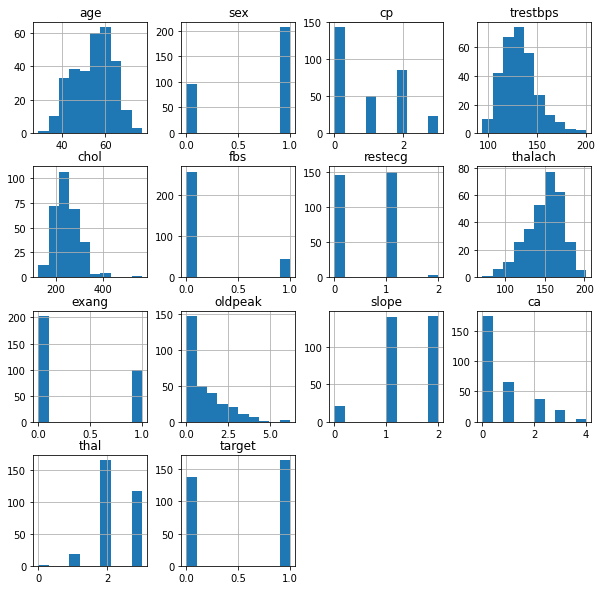

In [190]:
df.hist(figsize=(10,10))
plt.show()

In [191]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [192]:
df.shape

(302, 14)

In [193]:
linhas,colunas = df.shape

In [194]:
print(f'o numero de linhas do datframe é {linhas}')

o numero de linhas do datframe é 302


In [195]:
print(f'o numero de colunas do datframe é {colunas}')

o numero de colunas do datframe é 14


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [197]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Verificando a distribuição da idade

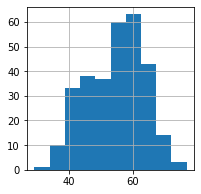

In [198]:
df['age'].hist(figsize=(3,3));

## Doenças cardíacas por idade


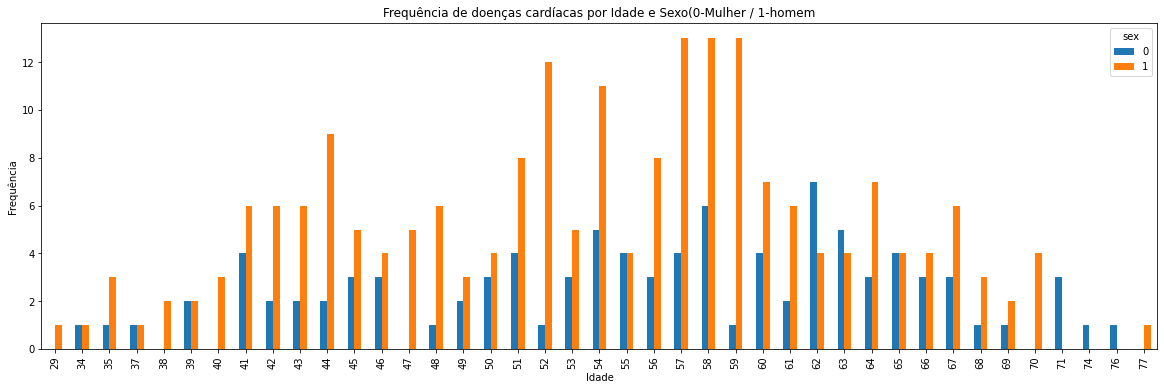

In [199]:
pd.crosstab(df.age, df.sex).plot(kind="bar", figsize=(20, 6))
plt.title("Frequência de doenças cardíacas por Idade e Sexo(0-Mulher / 1-homem")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.show()

In [200]:
x_list = np.linspace(df['age'].min(),df['age'].max(), 100)

In [201]:
x_list

array([29.        , 29.48484848, 29.96969697, 30.45454545, 30.93939394,
       31.42424242, 31.90909091, 32.39393939, 32.87878788, 33.36363636,
       33.84848485, 34.33333333, 34.81818182, 35.3030303 , 35.78787879,
       36.27272727, 36.75757576, 37.24242424, 37.72727273, 38.21212121,
       38.6969697 , 39.18181818, 39.66666667, 40.15151515, 40.63636364,
       41.12121212, 41.60606061, 42.09090909, 42.57575758, 43.06060606,
       43.54545455, 44.03030303, 44.51515152, 45.        , 45.48484848,
       45.96969697, 46.45454545, 46.93939394, 47.42424242, 47.90909091,
       48.39393939, 48.87878788, 49.36363636, 49.84848485, 50.33333333,
       50.81818182, 51.3030303 , 51.78787879, 52.27272727, 52.75757576,
       53.24242424, 53.72727273, 54.21212121, 54.6969697 , 55.18181818,
       55.66666667, 56.15151515, 56.63636364, 57.12121212, 57.60606061,
       58.09090909, 58.57575758, 59.06060606, 59.54545455, 60.03030303,
       60.51515152, 61.        , 61.48484848, 61.96969697, 62.45

In [202]:
y_list = norm.pdf(x_list, loc=df['age'].mean(), scale=df['age'].std())

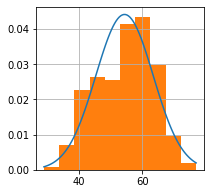

In [203]:
plt.plot(x_list,y_list)
df['age'].hist(density=True, figsize=(3,3));

In [204]:
df['age'].skew()

-0.20374327959596905

In [205]:
df['age'].kurtosis()

-0.5275122997069857

In [206]:
# Existem dados faltantes?
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Podemos ver que não existem dados faltantes nos dados avaliados acima.

### Quantas pessoas tem problemas cardíacos?

###1- significa que a pessoa tem problema cardíaco
### 0- significa que a pessoa não tem problema cardíaco




In [207]:
df['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

## Número de pessoas com problemas cardíacos.


Text(0.5, 1.0, '1-cardíaco / 0-Não cardíaco')

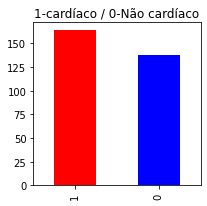

In [208]:
df['target'].value_counts().plot(kind='bar', color=['red','blue'], figsize=(3,3));
plt.title('1-cardíaco / 0-Não cardíaco')

In [209]:
df['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

In [210]:
qtd = df['sex'].value_counts()

In [211]:
print(f'a porcentagem de homens no conjunto de dados é: {qtd[1]/len(df)*100}')

a porcentagem de homens no conjunto de dados é: 68.21192052980133


In [212]:
print(f'a porcentagem de mulheres no conjunto de dados é: {qtd[0]/len(df)*100}')

a porcentagem de mulheres no conjunto de dados é: 31.788079470198678


## Número de problemas cardíacos por sexo

Text(0.5, 1.0, '1-Masculino / 0-Feminino')

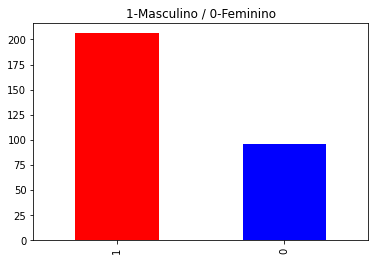

In [213]:
# 1- masculino
# 0- feminino
df['sex'].value_counts().plot(kind='bar', color=['red','blue']);
plt.title('1-Masculino / 0-Feminino')

In [214]:
pd.crosstab(df['target'],df['sex'])

sex,0,1
target,,
0,24,114
1,72,92


In [215]:
# "trestbps" -> batimentos cardíacos em repouso
df['trestbps'].unique()

array([125, 140, 145, 148, 138, 100, 114, 160, 120, 122, 112, 132, 118,
       128, 124, 106, 104, 135, 130, 136, 180, 129, 150, 178, 146, 117,
       152, 154, 170, 134, 174, 144, 108, 123, 110, 142, 126, 192, 115,
        94, 200, 165, 102, 105, 155, 172, 164, 156, 101])

In [216]:
df['trestbps'].nunique()

49

In [217]:
df['trestbps'].describe()

count    302.000000
mean     131.602649
std       17.563394
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

### Pegando os valores acima de 130 da coluna trestbps

In [218]:
df_trestbps_acima_130 = df[df['trestbps'] >= 130]

In [219]:
df_trestbps_acima_130.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0


In [220]:
pd.crosstab(df_trestbps_acima_130.target, df_trestbps_acima_130.trestbps)

trestbps,130,132,134,135,136,138,140,142,144,145,...,160,164,165,170,172,174,178,180,192,200
target,,,,,,,,,,,,,,,,,,,,,
0,13,5,3,1,2,3,15,1,2,4,...,6,1,1,3,0,1,1,2,1,1
1,23,3,2,5,1,9,17,2,0,1,...,5,0,0,1,1,0,1,1,0,0


In [221]:
df_trestbps_abaixo_130 = df[df['trestbps'] < 130]

In [222]:
pd.crosstab(df_trestbps_abaixo_130.target, df_trestbps_abaixo_130.trestbps)

trestbps,94,100,101,102,104,105,106,108,110,112,...,117,118,120,122,123,124,125,126,128,129
target,,,,,,,,,,,,,,,,,,,,,
0,0,2,0,0,0,0,0,2,11,4,...,1,2,14,1,1,4,7,2,6,0
1,2,2,1,2,1,3,1,4,8,5,...,0,5,23,3,0,2,4,1,6,1


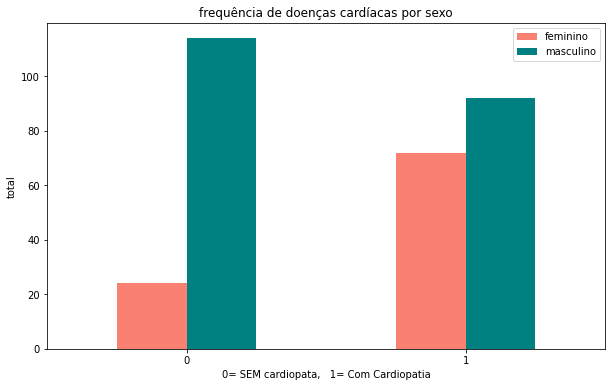

In [223]:
pd.crosstab(df['target'],df['sex']).plot(kind='bar',figsize=(10,6), color=['salmon','teal'])
plt.title('frequência de doenças cardíacas por sexo')
plt.xlabel('0= SEM cardiopata,   1= Com Cardiopatia')
plt.ylabel('total')
plt.legend(['feminino', 'masculino'])
plt.xticks(rotation=0);

In [224]:
df['chol'].unique()

array([212, 203, 174, 294, 248, 318, 289, 249, 286, 149, 341, 210, 298,
       204, 308, 266, 244, 211, 185, 223, 208, 252, 209, 307, 233, 319,
       256, 327, 169, 131, 269, 196, 231, 213, 271, 263, 229, 360, 258,
       330, 342, 226, 228, 278, 230, 283, 241, 175, 188, 217, 193, 245,
       232, 299, 288, 197, 315, 215, 164, 326, 207, 177, 257, 255, 187,
       201, 220, 268, 267, 236, 303, 282, 126, 309, 186, 275, 281, 206,
       335, 218, 254, 295, 417, 260, 240, 302, 192, 225, 325, 235, 274,
       234, 182, 167, 172, 321, 300, 199, 564, 157, 304, 222, 184, 354,
       160, 247, 239, 246, 409, 293, 180, 250, 221, 200, 227, 243, 311,
       261, 242, 205, 306, 219, 353, 198, 394, 183, 237, 224, 265, 313,
       340, 259, 270, 216, 264, 276, 322, 214, 273, 253, 176, 284, 305,
       168, 407, 290, 277, 262, 195, 166, 178, 141])

In [225]:
df['chol'].nunique()

152

In [226]:
df['chol'].describe()

count    302.000000
mean     246.500000
std       51.753489
min      126.000000
25%      211.000000
50%      240.500000
75%      274.750000
max      564.000000
Name: chol, dtype: float64

Text(0, 0.5, 'Níveis de Colesterol')

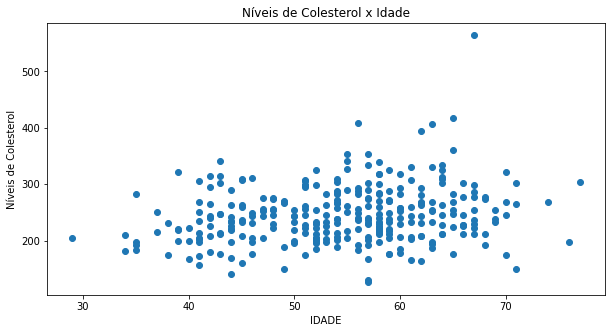

In [227]:
# VERIFICANDO O COLESTEROL DE ACORDO COM A IDADE

plt.figure(figsize=(10,5))
plt.scatter(df['age'],df['chol'],)
plt.title('Níveis de Colesterol x Idade')
plt.xlabel('IDADE')
plt.ylabel('Níveis de Colesterol')

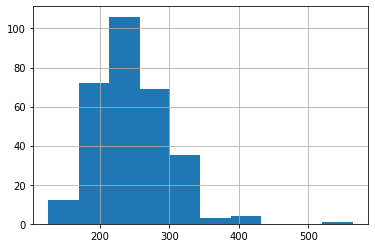

In [228]:
df['chol'].hist()

### criando novos valores para coluna chol onde se o valor de x for maior que 200 substitua por 1 senão substitua por 0 (0- colesterol normal / 1-colesterol alto)

In [229]:
# uma nova coluna terá 1 se chol maior que 200 e 0 se chol menor que 200
df['ev_chol'] = df['chol'].apply(lambda x: 1 if x > 200 else 0)

In [230]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,ev_chol
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,1
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,1
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,1
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,1


In [231]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,ev_chol
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,0
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0,1
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,1
878,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0,0


In [232]:
# 0 - colesterol abixo de 200
# 1 - colesterol acima de 200

# verificando a quantidade de pacientes com colesterol alto
df['ev_chol'].value_counts()

1    252
0     50
Name: ev_chol, dtype: int64

In [233]:
# pegando os valores da coluna chol maior ou igual a 200
df_chol_acima_200 = df[df['chol'] >= 200]

In [234]:
df_chol_acima_200.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,ev_chol
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,1
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,1
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,1
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,1
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,1


In [235]:
pd.crosstab(df_chol_acima_200.target, df_chol_acima_200.chol)

chol,200,201,203,204,205,206,207,208,209,210,...,341,342,353,354,360,394,407,409,417,564
target,,,,,,,,,,,,,,,,,,,,,
0,1,0,2,2,1,2,1,0,0,0,...,1,0,1,0,0,0,1,1,0,0
1,0,3,1,4,1,0,1,2,2,1,...,0,1,0,1,1,1,0,0,1,1


In [236]:
# fbs -> significa açucar no sangue em jejum
# se o valor do fbs for maior que 120 temos 1 senão temos 0
# acima de 126 sinais de diabetes

df['fbs'].unique()

array([0, 1])

In [237]:
df['fbs'].value_counts()

0    257
1     45
Name: fbs, dtype: int64

In [238]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,ev_chol
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,1
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,1
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,1
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,1


In [239]:
df['restecg'].unique()

array([1, 0, 2])

In [240]:
df['restecg'].value_counts()

1    151
0    147
2      4
Name: restecg, dtype: int64

In [241]:
pd.crosstab(df.target, df.restecg)

restecg,0,1,2
target,,,
0,79,56,3
1,68,95,1


"thalach" -> frequência cardíaca máxima alcançada.

In [242]:
df['thalach'].unique()

array([168, 155, 125, 161, 106, 122, 140, 145, 144, 116, 136, 192, 156,
       142, 109, 162, 165, 148, 172, 173, 146, 179, 152, 117, 115, 112,
       163, 147, 182, 105, 150, 151, 169, 166, 178, 132, 160, 123, 139,
       111, 180, 164, 202, 157, 159, 170, 138, 175, 158, 126, 143, 141,
       167,  95, 190, 118, 103, 181, 108, 177, 134, 120, 171, 149, 154,
       153,  88, 174, 114, 195, 133,  96, 124, 131, 185, 194, 128, 127,
       186, 184, 188, 130,  71, 137,  99, 121, 187,  97,  90, 129, 113])

In [243]:
df['thalach'].nunique()

91

In [244]:
df['thalach'].describe()

count    302.000000
mean     149.569536
std       22.903527
min       71.000000
25%      133.250000
50%      152.500000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

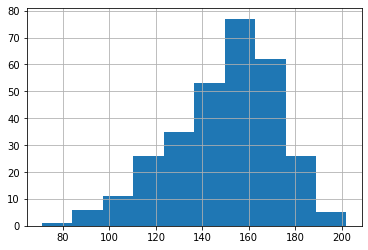

In [245]:
df['thalach'].hist();

"exang" -> Angina induzida por exercício

*   0 - Não
*   1 - Sim



In [246]:
df['exang'].unique()

array([0, 1])

In [247]:
df['exang'].nunique()

2

In [248]:
df['exang'].value_counts()

0    203
1     99
Name: exang, dtype: int64

In [249]:
pd.crosstab(df.target, df.exang)

exang,0,1
target,,
0,62,76
1,141,23


"oldpeak" -> Queda de ST induzida por exercício em relação ao repouso

*   Olha para o estresse do coração durante o exercício
*   Coração doente irá estressar mais



In [250]:
df['oldpeak'].dtype

dtype('float64')

In [251]:
df['oldpeak'].unique()

array([1. , 3.1, 2.6, 0. , 1.9, 4.4, 0.8, 3.2, 1.6, 3. , 0.7, 4.2, 1.5,
       2.2, 1.1, 0.3, 0.4, 0.6, 3.4, 2.8, 1.2, 2.9, 3.6, 1.4, 0.2, 2. ,
       5.6, 0.9, 1.8, 6.2, 4. , 2.5, 0.5, 0.1, 2.1, 2.4, 3.8, 2.3, 1.3,
       3.5])

In [252]:
df['oldpeak'].nunique()

40

In [253]:
df['oldpeak'].describe()

count    302.000000
mean       1.043046
std        1.161452
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

"slope" -> inclinição do segmento ST de pico de exercício


*   0: Upslopin: melhor frequência cardíca com exercício
*   1: Flatsloping: mudança mínima(coração saudável típico)
*   2: downslopins: sinais de coração doentio






In [254]:
df['slope'].dtype

dtype('int64')

In [255]:
df['slope'].unique()

array([2, 0, 1])

In [256]:
df['slope'].nunique()

3

In [257]:
pd.crosstab(df.target,df.slope)

slope,0,1,2
target,,,
0,12,91,35
1,9,49,106


"ca" -> número de vasos principais(0-3) coloridos por flurosopia

*   vaso colorido significa que o médico pode ver o sangue passando
*   quanto mais circulação sanguínea, melhor(sem coágulos)



In [258]:
df['ca'].dtype

dtype('int64')

In [259]:
df['ca'].unique()

array([2, 0, 1, 3, 4])

In [260]:
df['ca'].nunique()

5

In [261]:
pd.crosstab(df.target,df.ca)

ca,0,1,2,3,4
target,,,,,
0,45,44,31,17,1
1,130,21,7,3,3


"thal" ->  resultado de estresse com thal

*   1-3: normal
*   6: defeito corrigido: costumava ser defeito, mas agora está bem
*   7: defeito reversível: nenhum movimento sanguíneo adequado durante o exercício.





In [262]:
df['thal'].dtype

dtype('int64')

In [263]:
df['thal'].unique()

array([3, 2, 1, 0])

In [264]:
df['thal'].nunique()

4

In [265]:
pd.crosstab(df.target,df.thal)

thal,0,1,2,3
target,,,,
0,1,12,36,89
1,1,6,129,28


In [266]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,ev_chol
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,1
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,1
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,1
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,1


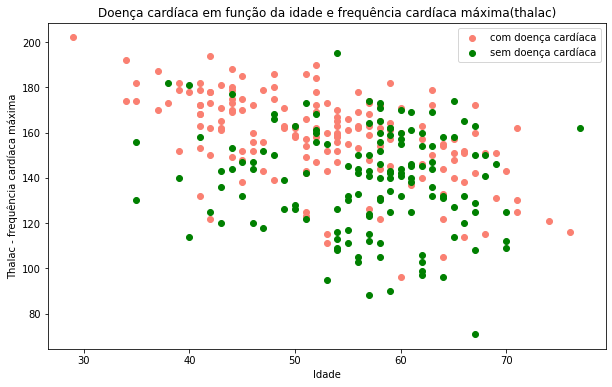

In [267]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1], df.thalach[df.target ==1], c='salmon')
plt.scatter(df.age[df.target==0], df.thalach[df.target ==0], c='green')

plt.title('Doença cardíaca em função da idade e frequência cardíaca máxima(thalac)')
plt.xlabel('Idade')
plt.ylabel('Thalac - frequência cardíaca máxima')
plt.legend(['com doença cardíaca', 'sem doença cardíaca'])

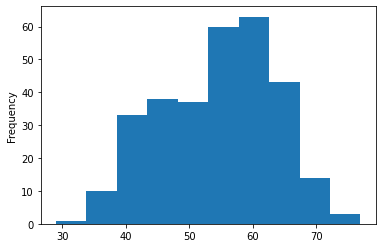

In [268]:
df['age'].plot.hist();

## vendo a correlação entre as variáveis

In [269]:
cor_matrix = df.corr()

In [270]:
cor_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,ev_chol
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476,0.136128
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609,-0.036236
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080,-0.033040
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269,0.074246
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437,0.573307
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826,0.011266
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874,-0.113243
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955,0.037589
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601,0.045372
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146,-0.030330


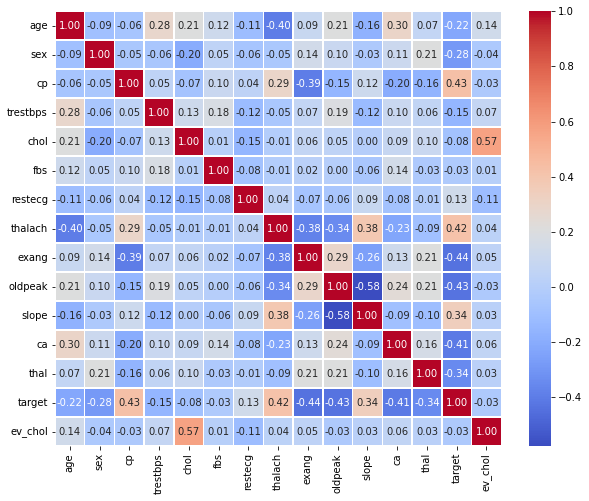

In [271]:
cor_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(cor_matrix, annot=True, linewidths=0.5,fmt='.2f',cmap='coolwarm')

## Machine learning( Regressão logística)

In [272]:
# DETERMINANDO O X E Y
X = df.drop('target', axis=1)

In [273]:
y = df['target']

In [274]:
# DIVIDIR O DATASET ENTRE TREINO E TESTE
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [275]:
#TREINANDO O MODELO
maquina_preditiva = LogisticRegression(C=0.01) # C=0.01 ajuda a máquina a ter uma melhor assertividade.

# agora vamos treinar a máquina preditiva
maquina_preditiva.fit(X_train, y_train)

LogisticRegression(C=0.01)

In [276]:
# MEDINDO A ACURÁCIA DO TESTE
resultado = maquina_preditiva.score(X_test,y_test)
print(f'a acurácia nos resultados dos testes é {(resultado*100).round(2)}%')

a acurácia nos resultados dos testes é 72.37%


In [277]:
# PREVISÕES E PROBABILIDADES EM CIMA DO DATASET

In [278]:
# mostrando os 7 primeiros valores previstos pela máquina
# 0- NÃO tem problema cardíaco   1- TEM problema cardíaco.

pred = maquina_preditiva.predict(X_test)
print(pred[:7])

[1 0 1 1 1 1 1]


In [279]:
# aqui é dado a probabilidade entre 0 e 1 para o paciente ser cardíaco ou não.
pred_proba = maquina_preditiva.predict_proba(X_test)
print(pred_proba[:7])

[[0.45714987 0.54285013]
 [0.86060214 0.13939786]
 [0.41012463 0.58987537]
 [0.45183673 0.54816327]
 [0.40627343 0.59372657]
 [0.09184789 0.90815211]
 [0.29974117 0.70025883]]


In [280]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.71      0.61      0.66        33
           1       0.73      0.81      0.77        43

    accuracy                           0.72        76
   macro avg       0.72      0.71      0.71        76
weighted avg       0.72      0.72      0.72        76



Descrição das métricas

*   **Precision** - Precisão de previsões positivas..
*   **Reacall** - Fração de positivos que foram identificados corretamente.
*   **f1-score**- representa a média harmonica entre precision e recall, sendo 0 o pior valor e 1 o melhor.






Text(24.0, 0.5, 'True label')

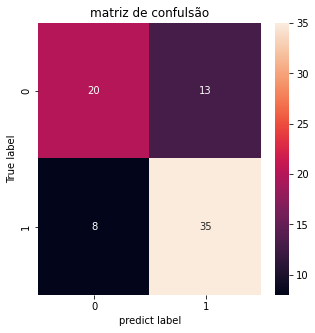

In [281]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,pred), annot=True)
plt.title('matriz de confulsão')
plt.xlabel('predict label')
plt.ylabel('True label')

## Comparando o resultado do modelo atual com o resultado previsto pela máquina

In [282]:
atual_vs_predict = pd.DataFrame({'atual': y_test, 'previsto': pred})

In [283]:
atual_vs_predict.head(10)

,atual,previsto
269,1,1
107,0,0
106,0,1
319,1,1
389,1,1
24,1,1
151,0,1
301,1,1
147,0,1
297,0,0


Podemos notar que o algoritmo teve um bom nível de assertividade para as primeiras 10 linhas.

## utilizando o random forest

In [284]:
from sklearn.ensemble import RandomForestClassifier

# IMPORTAÇÃO DAS FERRAMENTAS DE MÉTRICAS

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# IMPORTANDO O MODELO RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier

In [285]:
# DIVIDIR O DATASET ENTRE TREINO E TESTE
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Criando a máquina preditiva

In [286]:
# criando a máquina preditiva ( chamando o algoritmo a ser usado)
maq_RF = RandomForestClassifier(n_estimators=1000)

In [287]:
# treinando o algoritmo com os dados do treino
maq_RF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

## Avaliando a acurácia do modelo de machine learning

In [288]:
acuracia = maq_RF.score(X_test,y_test)
acuracia = (acuracia * 100).round(2)

print(f'A acurácia do modelo foi de : {acuracia}%')

A acurácia do modelo foi de : 86.84%


Podemos ver que com os mesmos dados mas utilizando o algoritmo de Random Forest tivemos um aproveitamento muito melhor na predição dos dados.

In [289]:

# Importância das variáveis
variaveis_importantes = maq_RF.feature_importances_
print(variaveis_importantes)

[0.09150569 0.03485354 0.13835749 0.07543328 0.08363367 0.01093989
 0.0221664  0.12231648 0.04295605 0.12621241 0.04953197 0.11408418
 0.07953793 0.00847101]


a soma de todos os valores da lista acima resulta em 100%.


In [290]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'ev_chol'],
      dtype='object')